 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = "Resources/whale_returns.csv"
whale_df = pd.read_csv(whale_path)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_df.drop(columns=['Date'], inplace=True)
whale_df.sort_index(ascending=True, inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_path = "Resources/algo_returns.csv"
algo_df = pd.read_csv(algo_path)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [9]:
algo_df.drop(columns=['Date'], inplace=True)
algo_df.sort_index(ascending=True, inplace=True)
algo_df.head(7)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285


In [10]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head(7)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_path = "Resources/sp500_history.csv"
sp500_df = pd.read_csv(sp500_path)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [13]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [14]:
# Fix Data Types - Remove '$'
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df.head()

<ipython-input-14-b87522418286>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$','')


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [15]:
# Fix Data Types - Convert Close to float
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()

,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [16]:
# Fix Data Types - Set Index & Parse Date column
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head(7)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48


In [17]:
# Calculate Daily Returns
sp500_rt = sp500_df.pct_change()
sp500_rt.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [18]:
# Drop nulls
sp500_rt.dropna(inplace=True)
sp500_rt.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_rt.rename(columns = {'Close': 'SP_500'}, inplace=True)
sp500_rt.head()

,SP_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_rtrns = pd.concat([sp500_rt, algo_df, whale_df], axis="columns", join='inner')
combined_rtrns.sort_index(inplace=True)
combined_rtrns.head(7)

,SP_500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.016961,-0.001392,-0.012155,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,-0.001918,0.002994,0.000605,0.004012,0.005163,0.003312,-0.001147


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

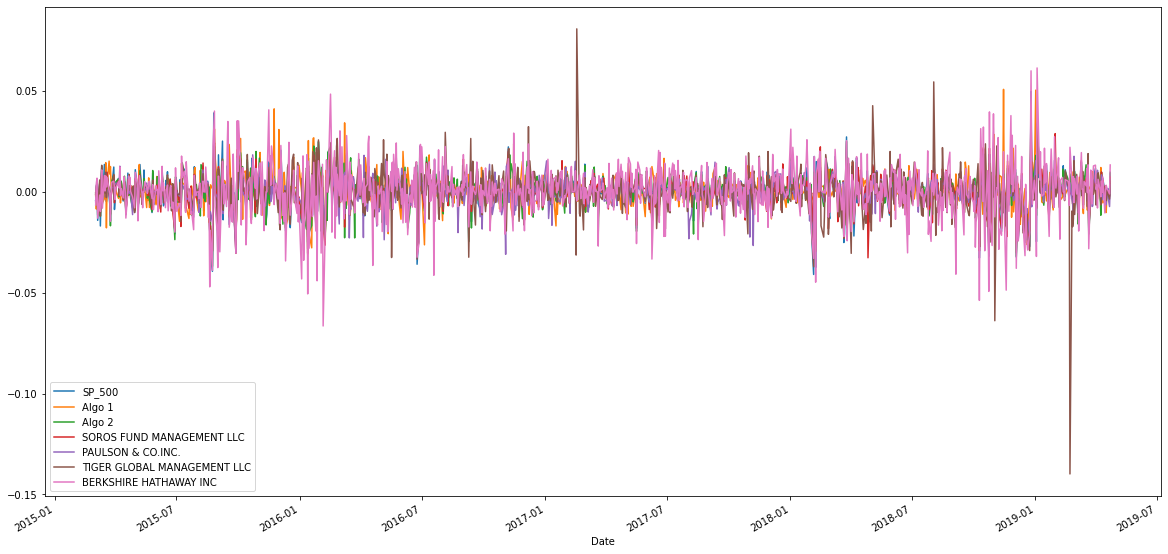

In [21]:
# Plot daily returns of all portfolios
combined_rtrns.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

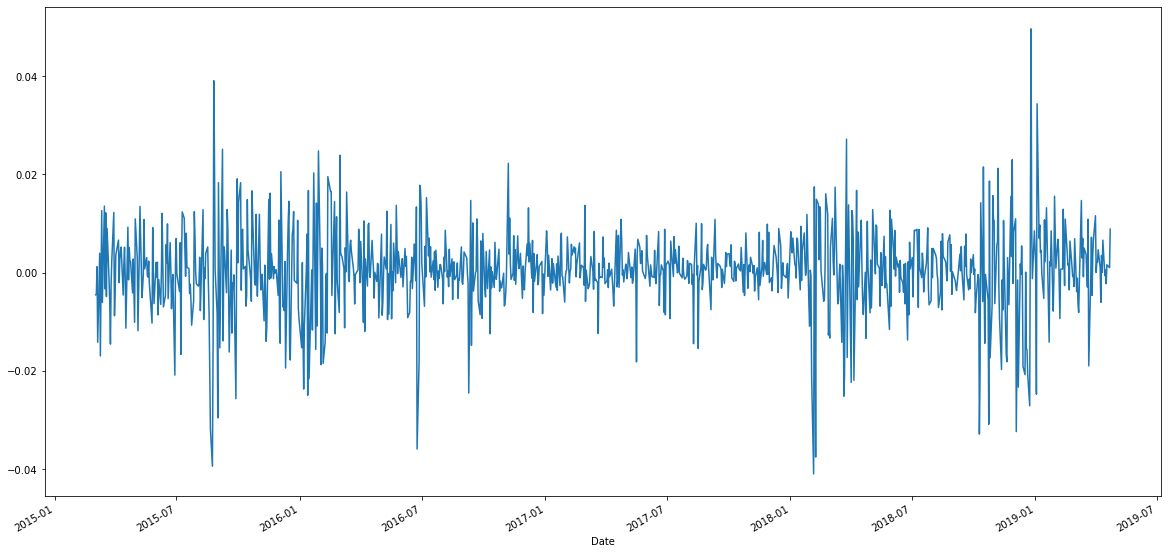

In [22]:
combined_rtrns['SP_500'].plot(figsize=(20,10))

In [23]:
combined_rtrns.columns

Index(['SP_500', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC',
       'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
       'BERKSHIRE HATHAWAY INC'],
      dtype='object')

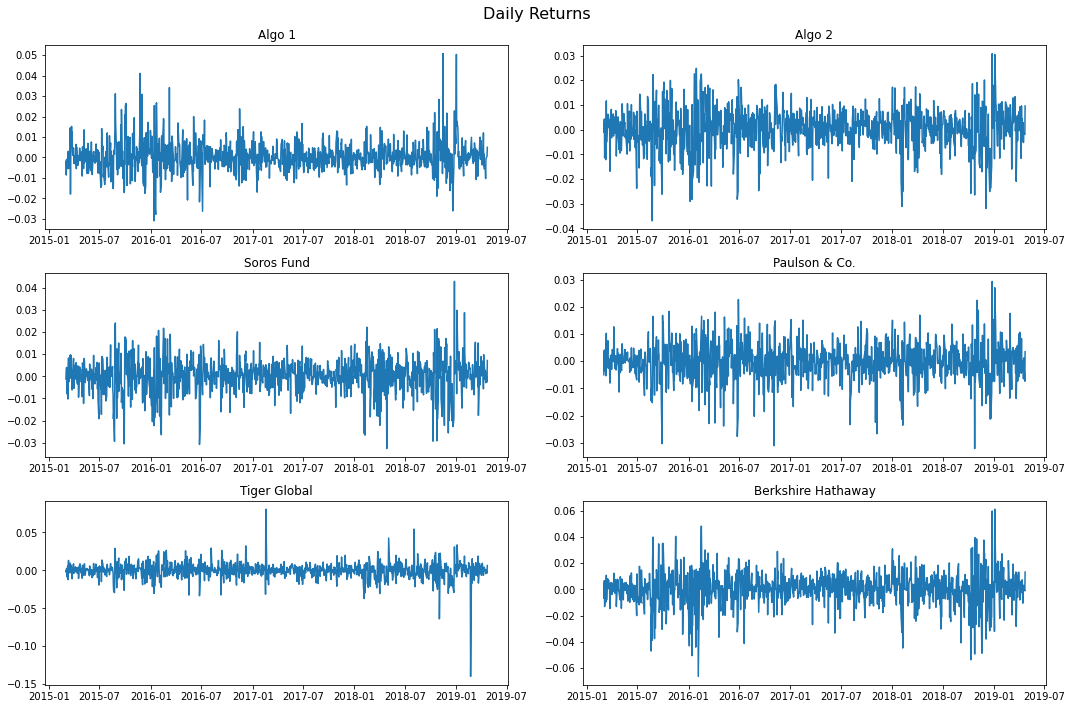

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
axes[0][0].plot(combined_rtrns['Algo 1'])
axes[0][0].set_title('Algo 1')
axes[0][1].plot(combined_rtrns['Algo 2'])
axes[0][1].set_title('Algo 2')
axes[1][0].plot(combined_rtrns['SOROS FUND MANAGEMENT LLC'])
axes[1][0].set_title('Soros Fund')
axes[1][1].plot(combined_rtrns['PAULSON & CO.INC. '])
axes[1][1].set_title('Paulson & Co.')
axes[2][0].plot(combined_rtrns['TIGER GLOBAL MANAGEMENT LLC'])
axes[2][0].set_title('Tiger Global')
axes[2][1].plot(combined_rtrns['BERKSHIRE HATHAWAY INC'])
axes[2][1].set_title('Berkshire Hathaway')

fig.suptitle('Daily Returns', fontsize=16)

plt.tight_layout()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

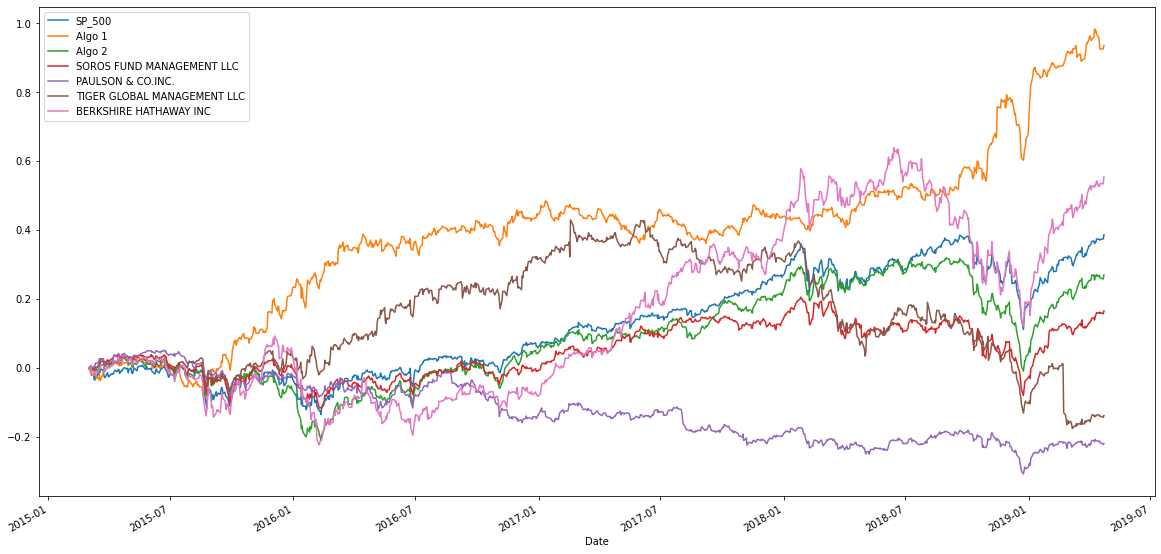

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_rtrns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

<AxesSubplot:xlabel='Date'>

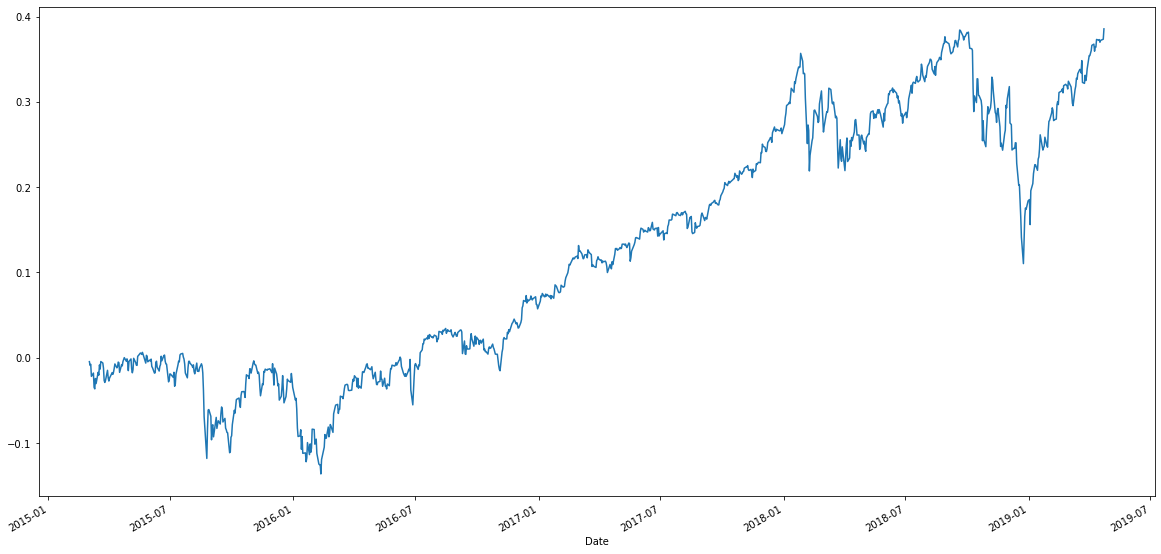

In [26]:
# Calculate cumulative returns of all portfolios
sp500_cumulative_returns = (1 + combined_rtrns['SP_500']).cumprod() - 1
# Plot cumulative returns
sp500_cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


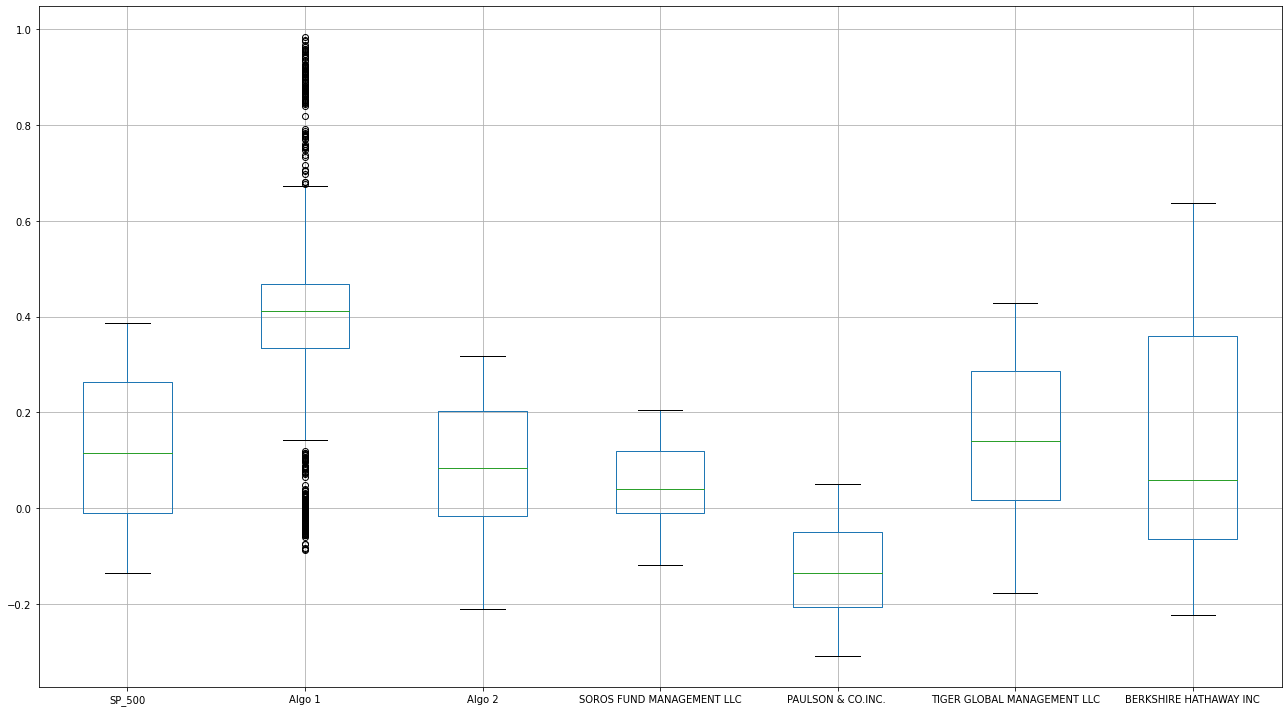

In [27]:
# Box plot to visually show risk
cumulative_returns.boxplot(figsize=(18, 10))
plt.tight_layout()
plt.show()

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_rtrns.std()
daily_std.sort_values(inplace=True)
daily_std.head(7)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP_500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [30]:
daily_std.index

Index(['PAULSON & CO.INC. ', 'Algo 1', 'SOROS FUND MANAGEMENT LLC', 'Algo 2',
       'SP_500', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [31]:
daily_std_df = daily_std.to_frame(name='Daily_Std')
daily_std_df

,Daily_Std
PAULSON & CO.INC.,0.007023
Algo 1,0.007620
SOROS FUND MANAGEMENT LLC,0.007895
Algo 2,0.008342
SP_500,0.008554
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [32]:
# Calculate  the daily standard deviation of S&P 500
SP_500_std = daily_std_df.loc['SP_500'][0]

print(SP_500_std)

0.008553731597758204


In [33]:
daily_std_df[['Daily_Std']]

,Daily_Std
PAULSON & CO.INC.,0.007023
Algo 1,0.007620
SOROS FUND MANAGEMENT LLC,0.007895
Algo 2,0.008342
SP_500,0.008554
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [34]:
# Using Filter to show only High Risk Portfolios:
Risky_Portfolios = daily_std_df[daily_std_df['Daily_Std'] > daily_std_df.loc['SP_500'][0]]
Risky_Portfolios

,Daily_Std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
annual_volatility = combined_rtrns.std() * np.sqrt(252)
print(annual_volatility)

SP_500                         0.135786
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

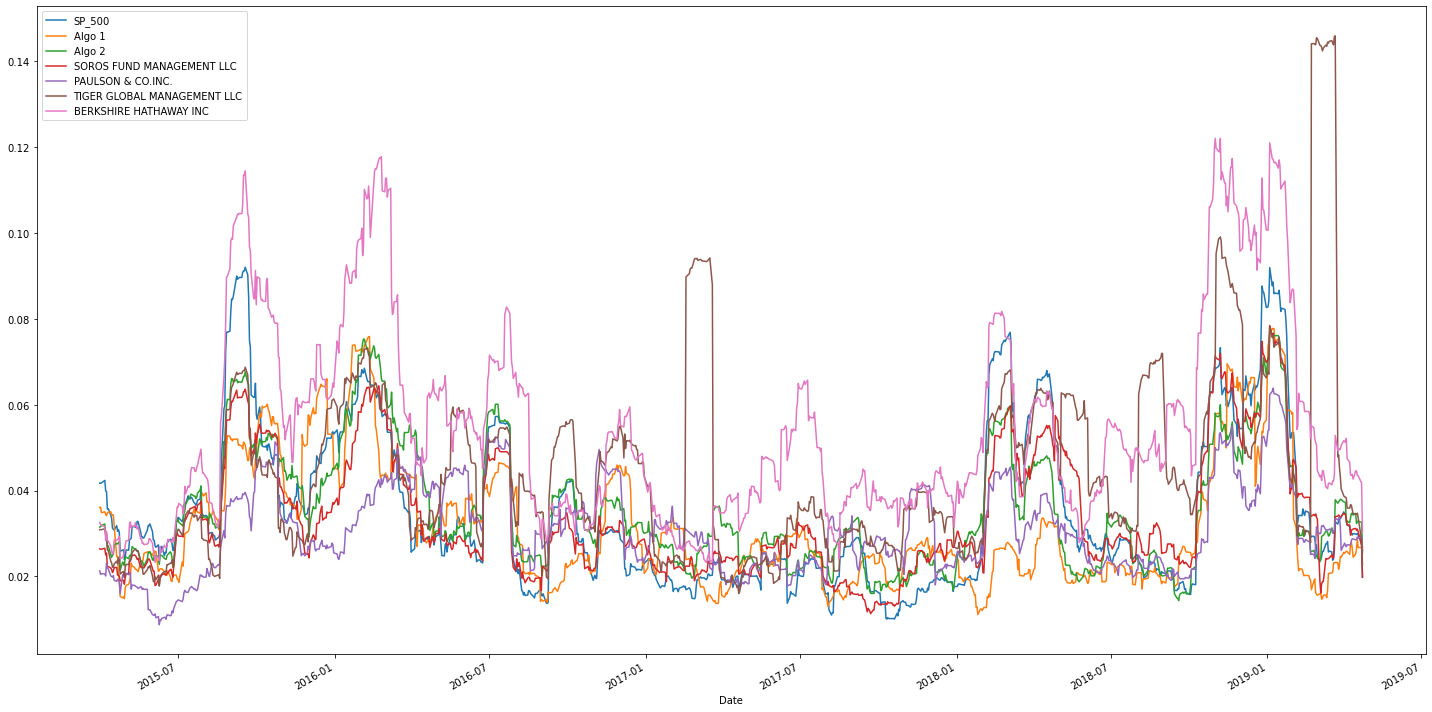

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
volatility_21day = combined_rtrns.rolling(window=21).std() * np.sqrt(21)
# print(volatility_21day)
# Plot the rolling standard deviation
volatility_21day.plot(figsize=(20,10))
plt.tight_layout()
plt.show()

### Calculate and plot the correlation

In [37]:
import seaborn as sns

<AxesSubplot:>

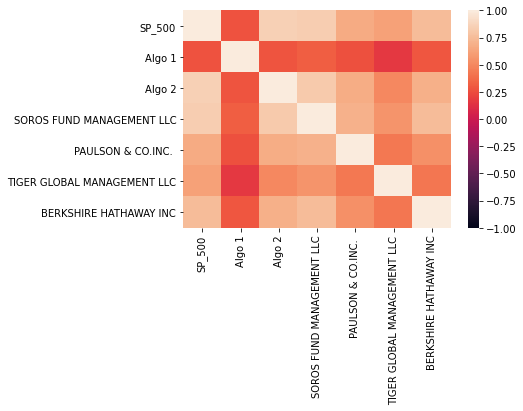

In [38]:
# Calculate the correlation
correlation = combined_rtrns.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

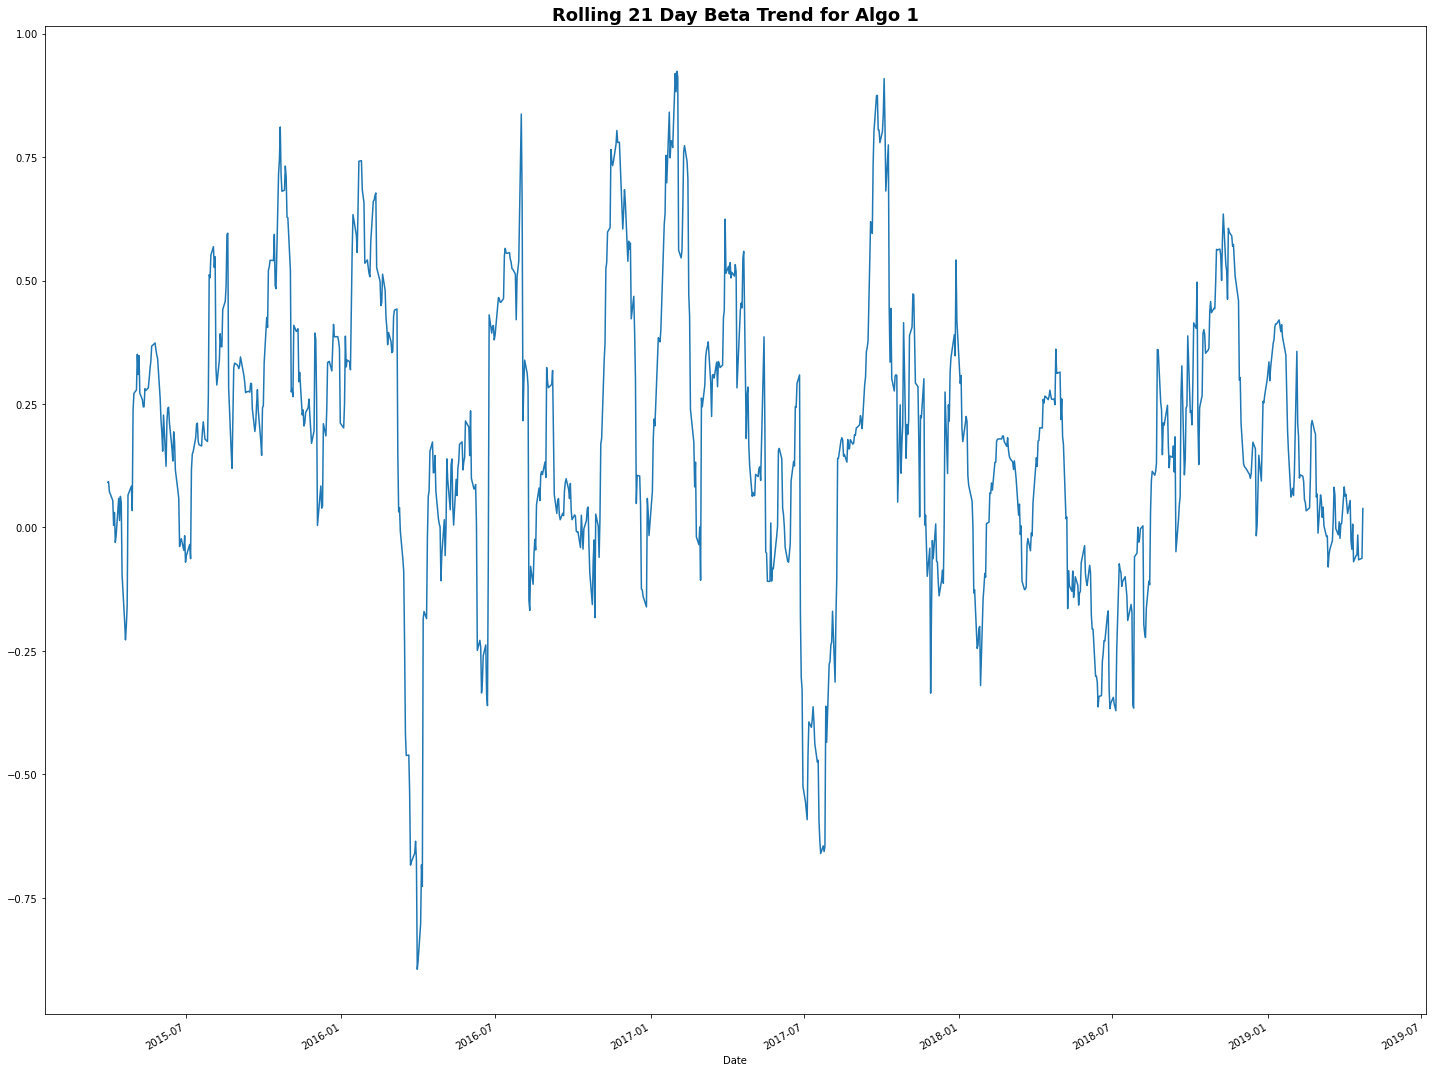

In [84]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_rtrns['Algo 1'].rolling(window=21).cov(combined_rtrns['SP_500'])
# print(f'The covariance of Algo 1 is {algo1_covariance}')
# Calculate variance of S&P 500
sp500_variance = combined_rtrns['SP_500'].rolling(window=21).var()
# print(f'The variance of the S&P 500 is {sp500_variance}')
# Computing beta
algo1_beta = algo1_covariance / sp500_variance
# print(f'The beta for the Algo 1 portfolio is {algo1_beta}')
# Plot beta trend
algo1_beta.plot(figsize=(20,15))
plt.title('Rolling 21 Day Beta Trend for Algo 1', fontsize=18, fontweight='extra bold')
plt.tight_layout()
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [91]:
ewm_sp500 = combined_rtrns['SP_500'].ewm(halflife=21).mean()
print(ewm_sp500)

Date
2015-03-03   -0.004539
2015-03-04   -0.004462
2015-03-05   -0.002514
2015-03-06   -0.005575
2015-03-09   -0.003543
                ...   
2019-04-16    0.001352
2019-04-17    0.001234
2019-04-18    0.001246
2019-04-22    0.001238
2019-04-23    0.001485
Name: SP_500, Length: 1043, dtype: float64


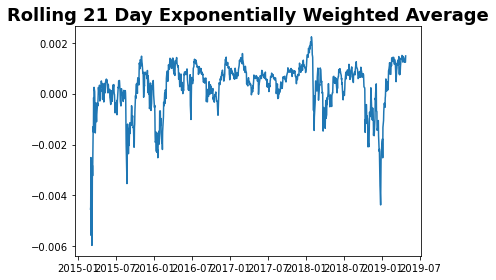

In [92]:
# Use `ewm` to calculate the rolling window

plt.plot(ewm_sp500)
plt.title('Rolling 21 Day Exponentially Weighted Average', fontsize=18, fontweight='extra bold')
plt.tight_layout()
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_rtrns.mean() * 252) / (combined_rtrns.std())
sharpe_ratios.sort_values()

PAULSON & CO.INC.              -7.676434
TIGER GLOBAL MANAGEMENT LLC    -1.921762
SOROS FUND MANAGEMENT LLC       5.657942
Algo 2                          7.958901
BERKSHIRE HATHAWAY INC          9.870930
SP_500                         10.290927
Algo 1                         21.885366
dtype: float64

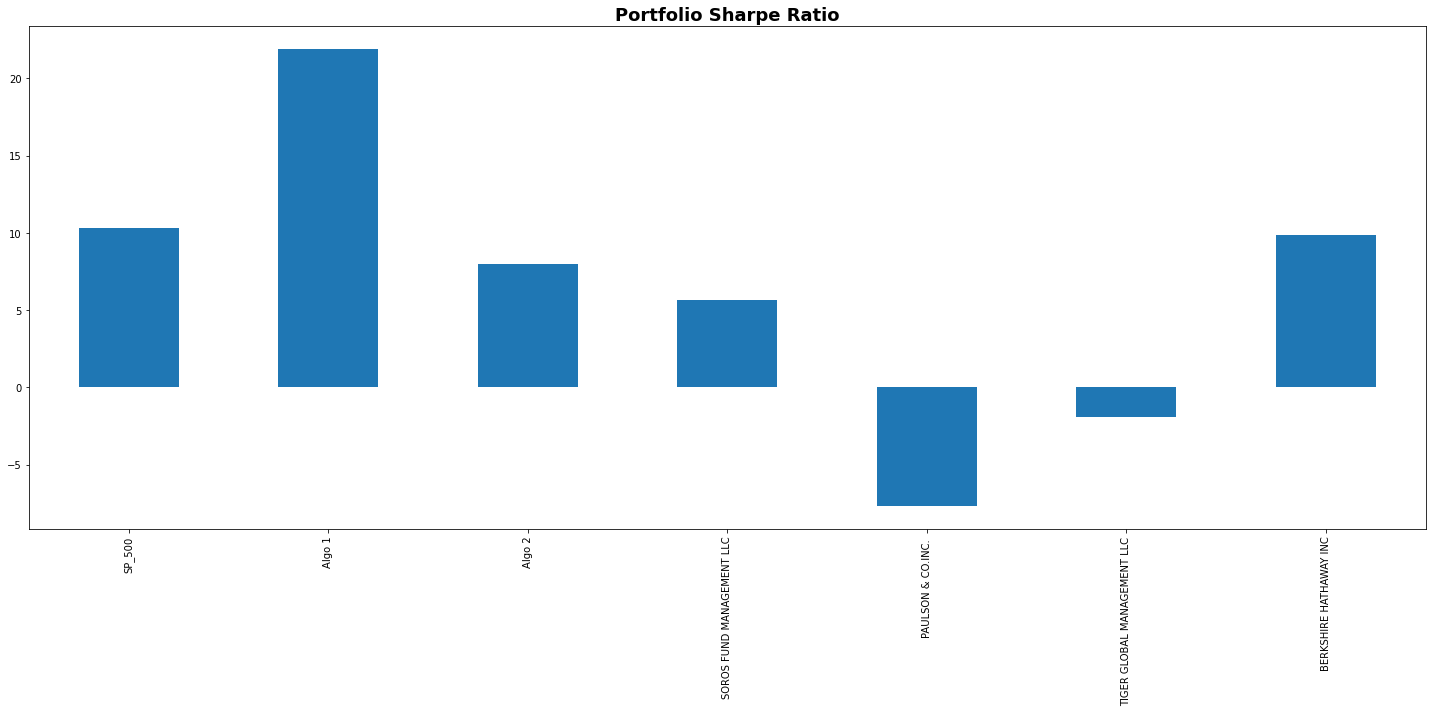

In [43]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10))
plt.title('Portfolio Sharpe Ratio', fontsize=18, fontweight='extra bold')
plt.tight_layout()
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 portfolio outperformed all of the other portfolios and the S&P 500.  Algo 2 portfolio outperformed the Soros, Paulson, and Tiger portfolios, but did not outperform the S&P 500 and Berkshire Hathaway.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [61]:
# Reading data from 1st stock
goog_path = "Resources/goog_historical.csv"
goog_df = pd.read_csv(goog_path)

# Drop irrelavent columns
goog_df.drop(columns='Symbol', inplace=True)
goog_df.rename(columns={'NOCP': 'GOOG', 'Trade DATE': 'Date'}, inplace=True)

# Parse Dates & set Index
goog_df.set_index(pd.to_datetime(goog_df['Date'], infer_datetime_format=True), inplace=True)
goog_df.drop(columns=['Date'], inplace=True)
goog_df.sort_index(ascending=True, inplace=True)

goog_df.head()


,GOOG
Date,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [60]:
# Reading data from 2nd stock
cost_path = "Resources/cost_historical.csv"
cost_df = pd.read_csv(cost_path)

# Drop irrelavent columns
cost_df.drop(columns='Symbol', inplace=True)
cost_df.rename(columns={'NOCP': 'COST', 'Trade DATE': 'Date'}, inplace=True)

# Parse Dates & set Index
cost_df.set_index(pd.to_datetime(cost_df['Date'], infer_datetime_format=True), inplace=True)
cost_df.drop(columns=['Date'], inplace=True)
cost_df.sort_index(ascending=True, inplace=True)

cost_df.head()

,COST
Date,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [62]:
# Reading data from 3rd stock
aapl_path = "Resources/aapl_historical.csv"
aapl_df = pd.read_csv(aapl_path)

# Drop irrelavent columns
aapl_df.drop(columns='Symbol', inplace=True)
aapl_df.rename(columns={'NOCP': 'AAPL', 'Trade DATE': 'Date'}, inplace=True)

# Parse Dates & set Index
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
aapl_df.drop(columns=['Date'], inplace=True)
aapl_df.sort_index(ascending=True, inplace=True)

aapl_df.head()


,AAPL
Date,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [63]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join='inner')
combined_df

,AAPL,COST,GOOG
Date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [48]:
# Reset Date index -> NOT NEEDED, ALREADY DONE


In [49]:
# Reorganize portfolio data by having a column per symbol -> NOT NEEDED, ALREADY DONE


In [64]:
# Calculate daily returns
daily_comb_rtrns = combined_df.pct_change()

# Drop NAs
daily_comb_rtrns.dropna(inplace=True)
daily_comb_rtrns.isnull().sum()
# Display sample data
daily_comb_rtrns

,AAPL,COST,GOOG
Date,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [65]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_daily_rtrns = daily_comb_rtrns.dot(weights)
# Display sample data
port_daily_rtrns.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [74]:
# Join your returns DataFrame to the original returns DataFrame
allPortfolio_rtrns = pd.concat([sp500_rt, algo_df, whale_df, port_daily_rtrns], axis="columns", join='inner')
allPortfolio_rtrns.sort_index(inplace=True)
allPortfolio_rtrns.rename(columns={0:"Personal"}, inplace=True)
allPortfolio_rtrns.head(7)

,SP_500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Personal
Date,,,,,,,,
2018-05-14,0.000884,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061
2018-05-21,0.007387,-0.003092,0.004924,0.002503,-0.001195,-0.001153,0.010370,0.007600
2018-05-22,-0.003136,0.011234,-0.005628,-0.002345,0.001168,-0.000240,-0.002455,-0.004962


In [75]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allPortfolio_rtrns.dropna()
allPortfolio_rtrns.isnull().sum()

SP_500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Personal                       0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [76]:
# Calculate the annualized `std`
annual_std = allPortfolio_rtrns.std() * np.sqrt(252)
print(annual_std)

SP_500                         0.152054
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Personal                       0.211496
dtype: float64


### Calculate and plot rolling `std` with 21-day window

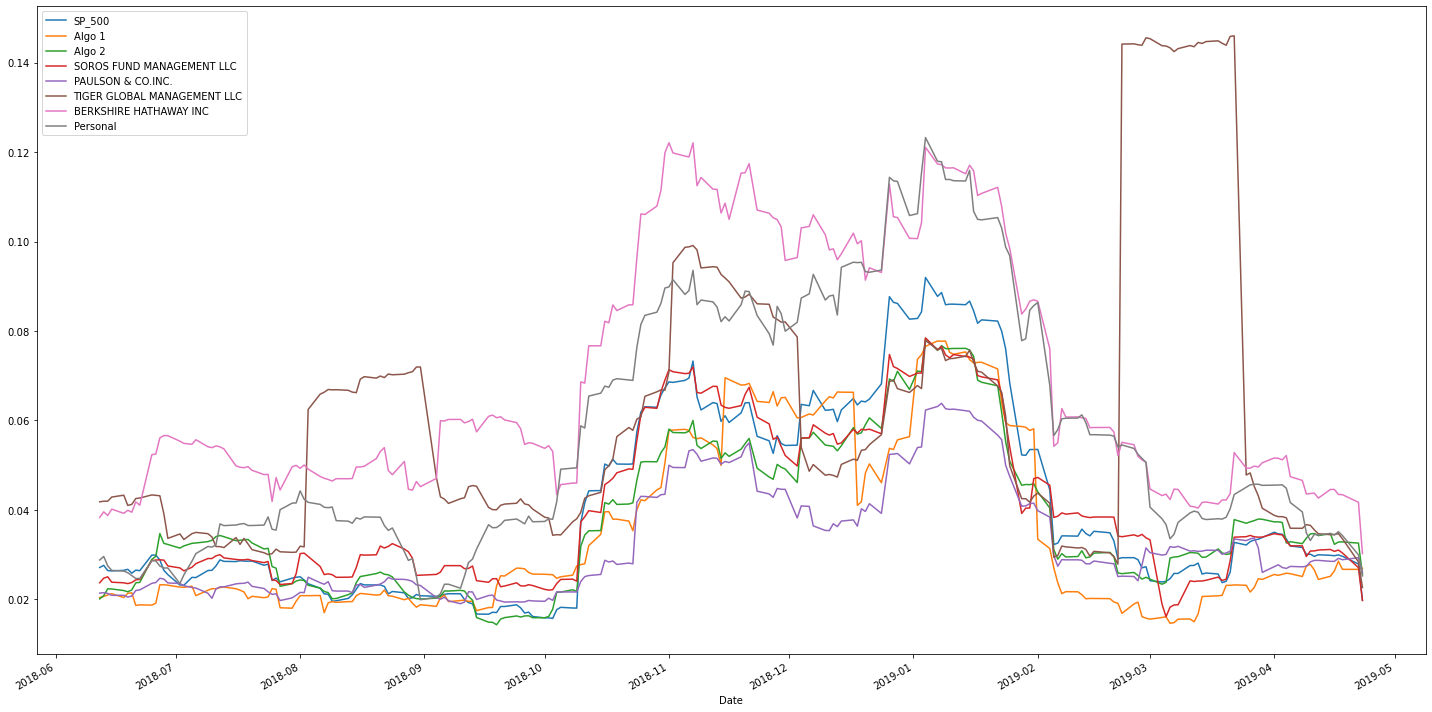

In [77]:
# Calculate rolling standard deviation
std_21dayRoll = allPortfolio_rtrns.rolling(window=21).std() * np.sqrt(21)

# Plot the rolling standard deviation
std_21dayRoll.plot(figsize=(20,10))
plt.tight_layout()
plt.show()

### Calculate and plot the correlation

<AxesSubplot:>

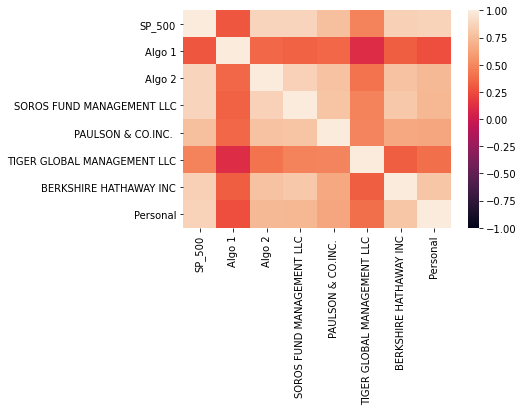

In [78]:
# Calculate and plot the correlation
portfolio_correlation = allPortfolio_rtrns.corr()

# Display de correlation matrix
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

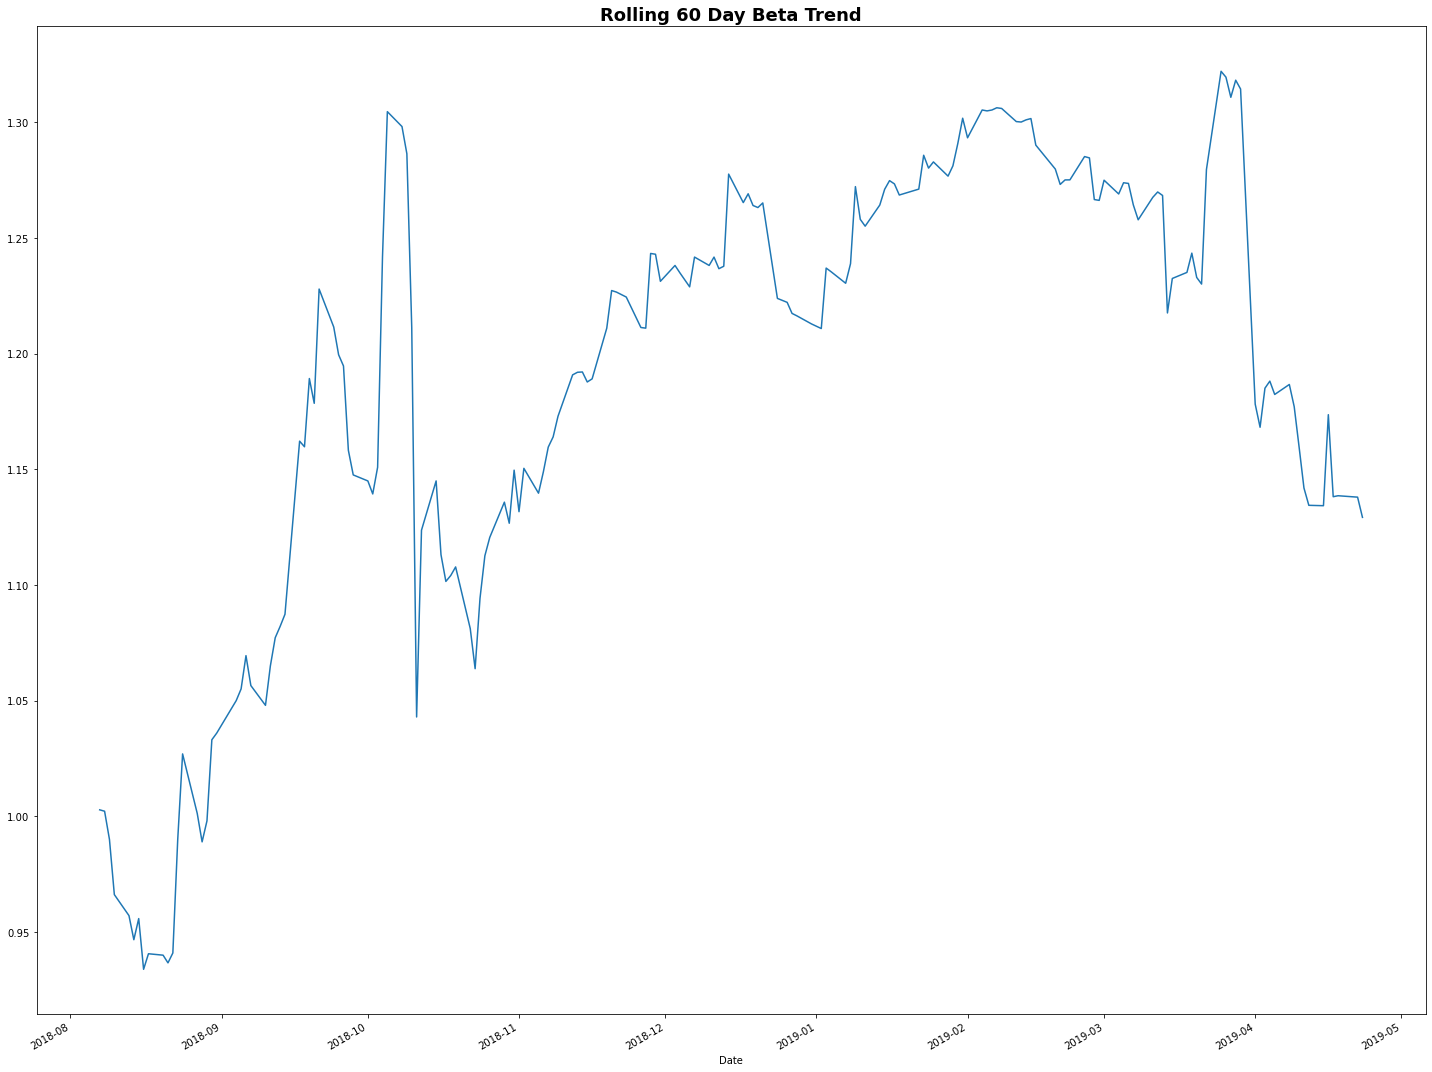

In [79]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
personal_covariance = allPortfolio_rtrns['Personal'].rolling(window=60).cov(combined_rtrns['SP_500'])

# Calculate variance of S&P 500
personal_variance = allPortfolio_rtrns['SP_500'].rolling(window=60).var()

# Computing beta
personal_beta = personal_covariance / personal_variance

# Plot beta trend
personal_beta.plot(figsize=(20,15))
plt.title('Rolling 60 Day Beta Trend', fontsize=18, fontweight='extra bold')
plt.tight_layout()
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [82]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_annualized = (allPortfolio_rtrns.mean() * 252) / (allPortfolio_rtrns.std())
sharpe_ratios_annualized.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -16.417675
Algo 2                          1.279600
BERKSHIRE HATHAWAY INC          2.536044
PAULSON & CO.INC.               4.107336
SOROS FUND MANAGEMENT LLC       6.837361
SP_500                          9.283728
Personal                       14.812863
Algo 1                         32.315180
dtype: float64

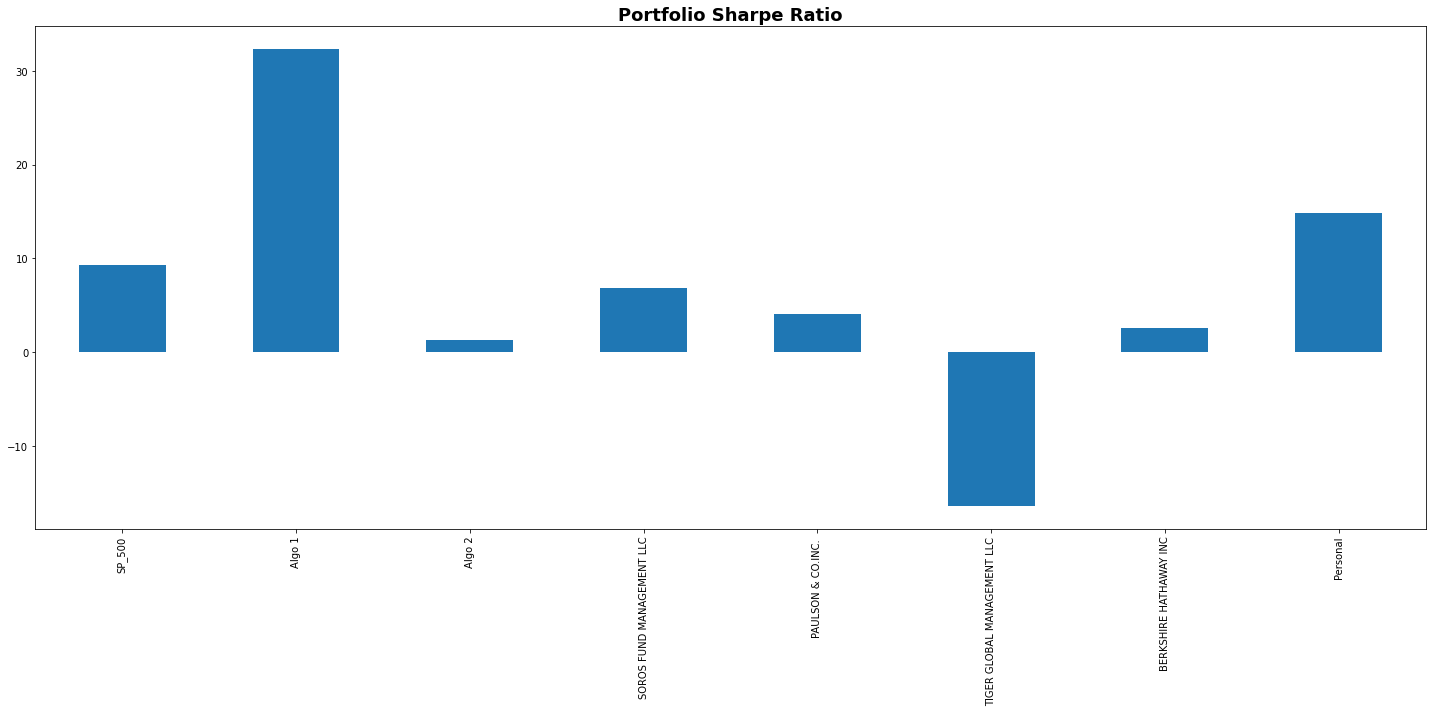

In [83]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_annualized.plot(kind='bar', figsize=(20,10))
plt.title('Portfolio Sharpe Ratio', fontsize=18, fontweight='extra bold')
plt.tight_layout()
plt.show()

### How does your portfolio do?

Write your answer here!

My personal portfolio is the second best in return to risk ratio (Sharpe Ratio) and is only beaten by Algo 1 portfolio.